# Warehouse Facility 02 - Warehouse Indexes assessment
*This notebook illustrates how to assess the product portfolio of a storage system by analysing the indexes.  
*Use the virtual environment logproj.yml to run this notebook.*
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import os
import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe


### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from analogistics.data.data_generator_warehouse import generateWarehouseData
D_locations, D_SKUs, D_movements, D_inventory = generateWarehouseData()


In [4]:
#print locations dataframe
display(HTML(D_locations.head().to_html()))

,NODECODE,IDWH,WHSUBAREA,IDLOCATION,LOCCODEX,LOCCODEY,LOCCODEZ,RACK,BAY,LEVEL
0,1,LOGICAL_WH1,AREA 1,1,0,0,0,0,0,0
0,1,FAKE,AREA 1,2,0,0,1200,0,0,1
0,1,FAKE,AREA 1,3,0,0,2400,0,0,2
0,1,LOGICAL_WH2,AREA 1,4,0,0,3600,0,0,3
0,1,LOGICAL_WH2,AREA 1,5,0,0,4800,0,0,4


In [5]:
#print SKUs master file dataframe
display(HTML(D_SKUs.head().to_html()))

,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT
0,0,PRODOTTO_0,77.505045,8.119494
0,1,PRODOTTO_1,39.646959,8.416488
0,2,PRODOTTO_2,66.096091,8.272023
0,3,PRODOTTO_3,16.283474,1.978878
0,4,PRODOTTO_4,30.122580,3.975660


In [6]:
#print SKUs master file dataframe
display(HTML(D_movements.head().to_html()))

,ITEMCODE,NODECODE,IDWH,WHSUBAREA,IDLOCATION,RACK,BAY,LEVEL,LOCCODEX,LOCCODEY,LOCCODEZ,ORDERCODE,PICKINGLIST,QUANTITY,VOLUME,WEIGHT,TIMESTAMP_IN,INOUT,ORDERTYPE
0,42,1,LOGICAL_WH2,AREA 1,1218,3,45,2,12000,36000,2400,661,661,4.628740,25.025721,1.699636,2020-01-02 00:16:54.867654,+,OTHER
0,88,1,FAKE,AREA 1,1634,4,62,3,16000,49600,3600,741,741,7.857420,80.795010,10.196586,2020-01-02 02:05:21.223321,-,OTHER
0,93,1,LOGICAL_WH2,AREA 1,150,0,29,4,0,23200,4800,170,170,14.328301,1097.339992,39.484017,2020-01-02 03:43:10.270363,+,PUTAWAY
0,28,1,FAKE,AREA 1,559,1,45,3,4000,36000,3600,324,324,2.399257,217.249345,9.705650,2020-01-02 03:47:11.809791,+,OTHER
0,48,1,FAKE,AREA 1,277,0,55,1,0,44000,1200,602,602,15.667309,113.504392,145.879437,2020-01-02 05:52:28.661846,-,OTHER


In [7]:
#print SKUs master file dataframe
display(HTML(D_inventory.head().to_html()))

,NODECODE,IDWH,ITEMCODE,IDLOCATION,QUANTITY,TIMESTAMP
0,1,LOGICAL_WH1,0,1384,12.660104,2020-01-02
0,1,FAKE,1,1078,5.527609,2020-01-02
0,1,LOGICAL_WH1,2,235,2.088260,2020-01-02
0,1,FAKE,3,1238,1.226784,2020-01-02
0,1,LOGICAL_WH2,4,1533,8.471855,2020-01-02


### Create folder hierarchy

In [8]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
root_path = os.path.join(pathResults,f"{string_casestudy}_results")
path_results = os.path.join(root_path,f"P8_warehouseAssessment")

os.makedirs(root_path, exist_ok=True)
os.makedirs(path_results, exist_ok=True)

### Set columns name

In [9]:
# %% SET COLUMNS MOVEMENTS
timecolumn_mov='TIMESTAMP_IN'
itemcodeColumns_mov='ITEMCODE'
inout_column_mov = 'INOUT'
x_col_mov = 'LOCCODEX'
y_col_mov = 'LOCCODEY'
z_col_mov = 'LOCCODEZ'

In [10]:
# %% SET COLUMNS SKUS
itemcodeColumns_sku='ITEMCODE'

In [11]:
# %% SET COLUMNS INVENTORY
itemcodeColumns_inv = 'ITEMCODE'

### Generate the inventory curve for each SKU

In [12]:
# generate the inventory curve for each SKU
from analogistics.supply_chain.information_framework import updatePartInventory
D_SKUs= updatePartInventory(D_SKUs,D_movements,D_inventory,timecolumn_mov,itemcodeColumns_sku,itemcodeColumns_mov,itemcodeColumns_inv) 


..\analogistics\supply_chain\information_framework.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_movements['MOVEMENT'] = D_movements['INOUT'].astype(str) + D_movements[quantityColums].astype(str)
..\analogistics\supply_chain\information_framework.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_movements['MOVEMENT'] = D_movements['MOVEMENT'].astype(float)
..\analogistics\supply_chain\information_framework.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [13]:
#print SKUs master file dataframe with inventory curve
display(HTML(D_SKUs.head().to_html()))

,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT,INVENTORY_QTY,INVENTORY_DAYS
0,0,PRODOTTO_0,77.505045,8.119494,"[12.66010410414165, 12.66010410414165, 12.66010410414165, 12.66010410414165, 12.66010410414165, 20.51333006672933, 20.51333006672933, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 19.96197799701187, 23.924456193556765, 23.924456193556765, 23.924456193556765, 23.924456193556765, 23.924456193556765, 23.924456193556765, 16.31661271586671, 16.31661271586671, 16.31661271586671, 16.31661271586671, 16.31661271586671, 16.31661271586671, 16.31661271586671, 16.31661271586671, 16.31661271586671, 16.31661271586671, 36.048436000041924]","[2020-002, 2020-003, 2020-004, 2020-005, 2020-006, 2020-007, 2020-008, 2020-009, 2020-010, 2020-011, 2020-012, 2020-013, 2020-014, 2020-015, 2020-016, 2020-017, 2020-018, 2020-019, 2020-020, 2020-021, 2020-022, 2020-023, 2020-024, 2020-025, 2020-026, 2020-027, 2020-028, 2020-029, 2020-030, 2020-031, 2020-032, 2020-033, 2020-034, 2020-035, 2020-036, 2020-037, 2020-038, 2020-039, 2020-040, 2020-041]"
1,1,PRODOTTO_1,39.646959,8.416488,"[5.527609180870894, 5.527609180870894, 5.527609180870894, 58.90429169778147, 58.90429169778147, 58.90429169778147, 58.90429169778147, 58.90429169778147, 58.90429169778147, 58.90429169778147, 58.90429169778147, 58.90429169778147, 53.15571270158353, 53.15571270158353, 53.15571270158353, 53.15571270158353, 53.15571270158353, 53.15571270158353, 53.15571270158353, 61.31880441488809, 61.31880441488809, 61.31880441488809, 61.31880441488809, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676, 45.04124286432676]","[2020-002, 2020-003, 2020-004, 2020-005, 2020-006, 2020-007, 2020-008, 2020-009, 2020-010, 2020-011, 2020-012, 2020-013, 2020-014, 2020-015, 2020-016, 2020-017, 2020-018, 2020-019, 2020-020, 2020-021, 2020-022, 2020-023, 2020-024, 2020-025, 2020-026, 2020-027, 2020-028, 2020-029, 2020-030, 2020-031, 2020-032, 2020-033, 2020-034, 2020-035, 2020-036, 2020-037, 2020-038, 2020-039, 2020-040, 2020-041]"
2,2,PRODOTTO_2,66.096091,8.272023,"[2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 2.0882599822143675, 34.42090704423117, 34.42090704423117, 34.42090704423117, 44.31963132796941, 44.31963132796941, 45.37085804950797, 45.37085804950797, 45.37085804950797, 45.37085804950797, 45.37085804950797, 45.37085804950797, 45.37085804950797, 45.37085804950797, 45.37085804950797, 45.37085804950797, 45.37085804950797, 45.37085804950797, 45.37085804950797, 45.37085804950797, 48.5889305404625, 48.5889305404625]","[2020-002, 2020-003, 2020-004, 2020-005, 2020-006, 2020-007, 2020-008, 2020-009, 2020-010, 2020-011, 2020-012, 2020-013, 2020-014, 2020-015, 2020-016, 2020-017, 2020-018, 2020-019, 2020-020, 2020-021, 2020-022, 2020-023, 2020-024, 2020-025, 2020-026, 2020-027, 2020-028, 2020-029, 2020-030, 2020-031, 2020-032, 2020-033, 2020-034, 2020-035, 2020-036, 2020-037, 2020-038, 2020-039, 2020-040, 2020-041]"
3,3,PRODOTTO_3,16.283474,1.978878,"[1.2267836122015, 1.2267836122015, 1.2267836122015, 21.354985837661268, 21.354985837661268, 21.354985837661268, 21.354985837661268, 21.354985837661268, 21.354985837661268, 21.354985837661268, 1.2267836122015, 1.2267836122015, 2.747532989663481, 2.747532989663481, 8.8943161525

### Calculate the popularity index

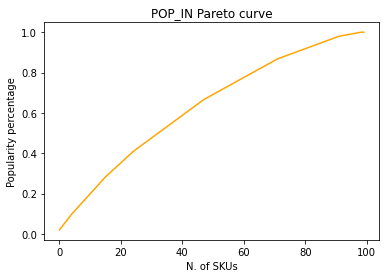

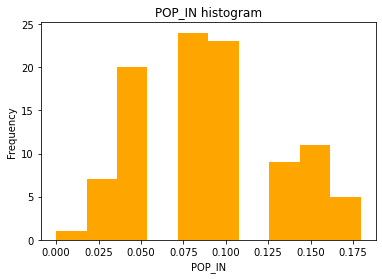

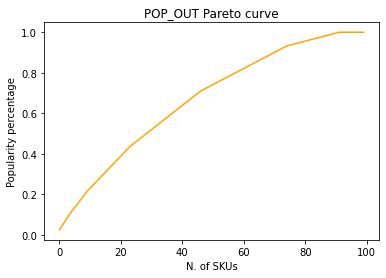

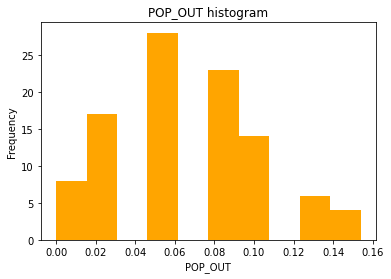

In [15]:
# %% POPULARITY INDEX

path_current = os.path.join(path_results,f"SKUs indices")
os.makedirs(path_current, exist_ok=True)

from analogistics.supply_chain.P8_performance_assessment.wh_indexes import updatePopularity, whIndexParetoPlot


D_SKUs = updatePopularity(D_SKUs)

#POPULARITY IN
output_figures = whIndexParetoPlot(D_SKUs,'POP_IN')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png")  
        
#POPULARITY OUT
output_figures = whIndexParetoPlot(D_SKUs,'POP_OUT')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png")  

### Calculate the order completion (OC) index

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


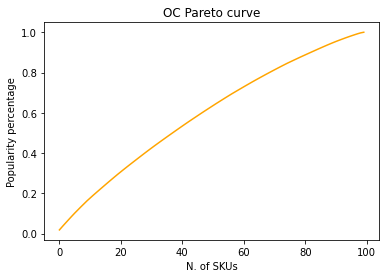

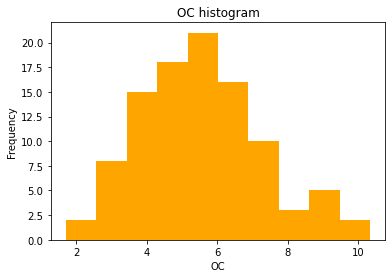

In [16]:
# %% ORDER COMPLETION INDEX
from analogistics.supply_chain.P8_performance_assessment.wh_indexes import updateOrderCompletion
D_SKUs = updateOrderCompletion(D_SKUs, D_movements)

#OC
output_figures = whIndexParetoPlot(D_SKUs,'OC')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 


### Calculate the Cube-per-order index (COI)

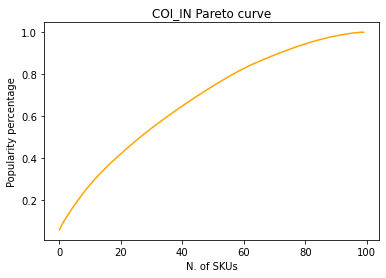

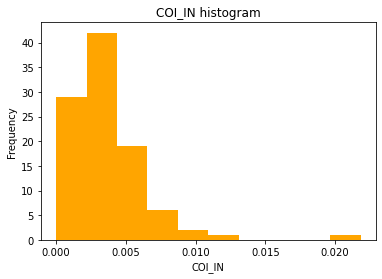

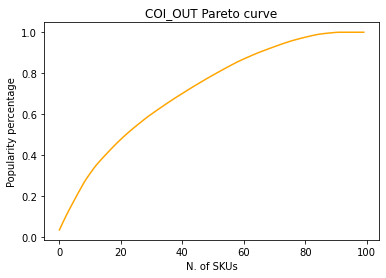

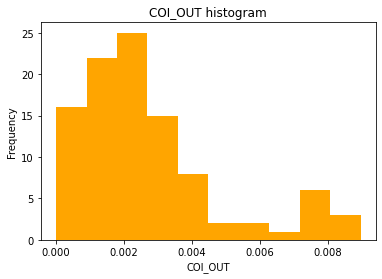

In [17]:
# %% COI INDEX
from analogistics.supply_chain.P8_performance_assessment.wh_indexes import updateCOI
D_SKUs = updateCOI(D_SKUs)

#COI IN
output_figures = whIndexParetoPlot(D_SKUs,'COI_IN')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 
        
#COI OUT
output_figures = whIndexParetoPlot(D_SKUs,'COI_OUT')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 



### Calculate the TURN index

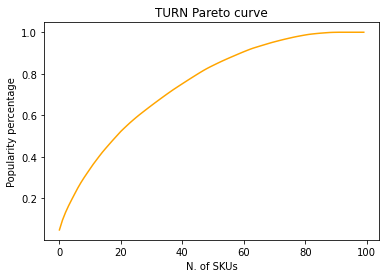

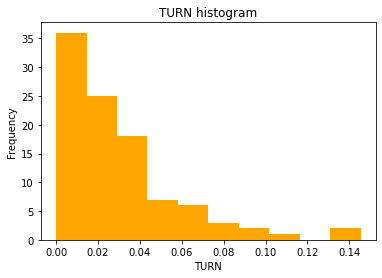

In [18]:
# %% TURN INDEX
from analogistics.supply_chain.P8_performance_assessment.wh_indexes import updateTURN
D_SKUs = updateTURN(D_SKUs)

#COI IN
output_figures = whIndexParetoPlot(D_SKUs,'TURN')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 

### Calculate the interarrival time

In [21]:
# %% INTERARRIVAL TIME
from analogistics.supply_chain.information_framework import updateInterarrivalTime
D_SKUs = updateInterarrivalTime(D_SKUs)




### Calculate the Fourier transform of the inventory curve

In [23]:
# %% INTERARRIVAL TIME
from analogistics.supply_chain.P8_performance_assessment.wh_indexes import updateFourieranalysis
D_SKUs = updateFourieranalysis(D_SKUs)

..\analogistics\statistics\time_series.py:517: RuntimeWarning: divide by zero encountered in true_divide
  weeks = 1 / xf


### Save the SKU table with parameters

In [24]:
# %% save sku table
D_SKUs.to_excel(path_current+"\\SKUs.xlsx")